In [358]:
import numpy as np # scientific computing
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg # reading images
from skimage.color import rgb2gray # converting rgb images to grayscale
import cv2
import math


save = False

### Part 1: Detecting/Tracking the position of parking space(s)

**Step 1**: Gray-Scale

**Step 2**: Apply Gaussian Blur to the image to reduce noise.

**Step 3**: Canny

**Step 4**: Hough Lines

[[0, 86, 600, 86], [0, 309, 600, 309], [25, 211, 565, 211], [24, 195, 591, 195], [25, 210, 611, 210], [24, 196, 559, 196], [503, 309, 503, 86], [324, 309, 324, 86], [563, 309, 563, 86], [84, 309, 87, 86], [205, 309, 205, 86], [564, 309, 564, 86], [384, 309, 384, 86], [504, 309, 504, 86], [24, 309, 27, 86], [265, 309, 265, 86], [145, 309, 145, 86], [24, 309, 26, 86], [383, 309, 383, 86], [146, 309, 146, 86], [443, 309, 443, 86], [264, 309, 264, 86], [325, 309, 325, 86], [206, 309, 206, 86], [204, 309, 204, 86], [84, 309, 86, 86]]


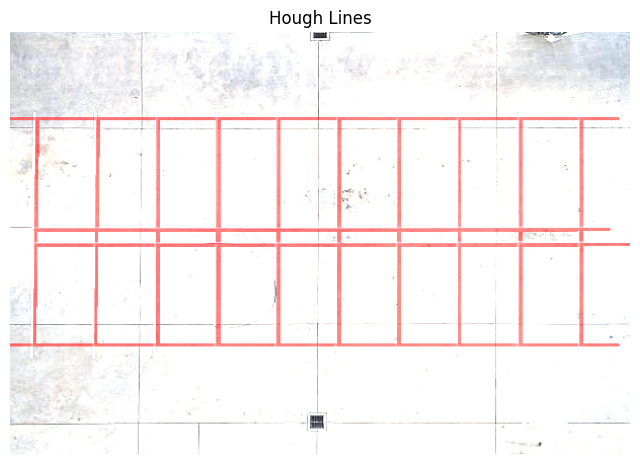

In [359]:
img1 = mpimg.imread('images/lot_empty.jpg')
img1_sliced = img1[:,:,:3]

img1_gray = cv2.cvtColor(img1_sliced, cv2.COLOR_BGR2GRAY)
img1_blur = cv2.GaussianBlur(img1_gray, (5, 5), 1.505)
img1_canny = cv2.Canny(img1_blur, 50, 150)


""" plt.figure(figsize=(8, 8))
plt.axis('off')
plt.title('Gaussian Blur')
plt.imshow(img1_blur, cmap='gray')
if save:
    plt.savefig('original1.png')
plt.show()

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.title('Canny')
plt.imshow(img1_canny, cmap='gray')
if save:
    plt.savefig('original1.png')
plt.show()
 """

# Attempt to remove double lines with kernel and dilation and eroding
kernel = np.ones((4,4),np.uint8)
img1_canny = cv2.dilate(img1_canny, kernel, iterations=2)
img1_canny = cv2.erode(img1_canny, kernel, iterations=3)


lines = cv2.HoughLinesP(image=img1_canny, rho=1, theta=np.pi/180, threshold=75, minLineLength=15, maxLineGap=90)
line_image = np.copy(img1)
# @@@@@@@@@@@@ DRAWING LINES AFTER MODIFYING COORDINATES
heightsTop = []
heightsBot = []


count = 0
prevLine = lines[0]
threshold = 30
for line in lines:
    for x1, y1, x2, y2 in line:
        #print(line)
        #print(x1, y1, x2, y2)
        # cv2.line(line_image, (x1, y1), (x2, y2), (255, 0 , 0), 2)
        # y1 is higher?
        #print('checking:',x1,x2,prevLine[0][0],prevLine[0][2])
        if (x1 == x2 and prevLine[0][0] == prevLine[0][2]):
          # is vertical and prevLine is vertical
          #print("line is vertical")
          heightsBot.append(y1)
          heightsTop.append(y2)
          # cv2.line(line_image, (x1, y1), (prevLine[0][0], prevLine[0][1]), (255, 0 , 0), 2)
          # cv2.line(line_image, (x2, y2), (prevLine[0][0], prevLine[0][3]), (255, 0 , 0), 2)
    prevLine = line
    # count+=1
    # if (count ==15):
      # break

# print(heightsBot)
median = int(np.median(heightsTop))
median2 = int(np.median(heightsBot))
#list for all line coordinates
line_list = []

#top and bottom lines
cv2.line(line_image, (0, median), (600, median), (255, 0 , 0), 2)
cv2.line(line_image, (0, median2), (600, median2), (255, 0 , 0), 2)

#append top and bottom to list
line_list.append([0, median, 600, median])
line_list.append([0, median2, 600, median2])


for i in range(len(lines)):
    # print('t')
    for x1, y1, x2, y2 in lines[i]:
        #print('before:',lines[i])
        if (abs(lines[i][0][0] - lines[i][0][2]) < 4):
          # line[0][1] = median2
          lines[i][0][1] = median2
          lines[i][0][3] = median
          #print('     after:',line)
        #append the rest of the lines
        line_list.append([x1, lines[i][0][1], x2, lines[i][0][3]])
        cv2.line(line_image, (x1, lines[i][0][1]), (x2, lines[i][0][3]), (255, 0 , 0), 2)

print(line_list)
#print(lines)
for i in range(len(line_list)):
    cv2.line(line_image, (line_list[i][0], line_list[i][1]), (line_list[i][2], line_list[i][3]), (255, 0 , 0), 2)
    
#Transparent image kinda with lines
lines_edges = cv2.addWeighted(img1, 0.8, line_image, 1, 0)

#print(lines)

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.title('Hough Lines')
plt.imshow(lines_edges, cmap='gray')
if save:
    plt.savefig('original1.png')
plt.show()

**Step 5:** Processing perpendicular lines

[([0, 86, 600, 86], [503, 309, 503, 86]), ([0, 86, 600, 86], [324, 309, 324, 86]), ([0, 86, 600, 86], [563, 309, 563, 86]), ([0, 86, 600, 86], [84, 309, 87, 86]), ([0, 86, 600, 86], [205, 309, 205, 86]), ([0, 86, 600, 86], [564, 309, 564, 86]), ([0, 86, 600, 86], [384, 309, 384, 86]), ([0, 86, 600, 86], [504, 309, 504, 86]), ([0, 86, 600, 86], [24, 309, 27, 86]), ([0, 86, 600, 86], [265, 309, 265, 86]), ([0, 86, 600, 86], [145, 309, 145, 86]), ([0, 86, 600, 86], [24, 309, 26, 86]), ([0, 86, 600, 86], [383, 309, 383, 86]), ([0, 86, 600, 86], [146, 309, 146, 86]), ([0, 86, 600, 86], [443, 309, 443, 86]), ([0, 86, 600, 86], [264, 309, 264, 86]), ([0, 86, 600, 86], [325, 309, 325, 86]), ([0, 86, 600, 86], [206, 309, 206, 86]), ([0, 86, 600, 86], [204, 309, 204, 86]), ([0, 86, 600, 86], [84, 309, 86, 86]), ([0, 309, 600, 309], [503, 309, 503, 86]), ([0, 309, 600, 309], [324, 309, 324, 86]), ([0, 309, 600, 309], [563, 309, 563, 86]), ([0, 309, 600, 309], [84, 309, 87, 86]), ([0, 309, 600, 30

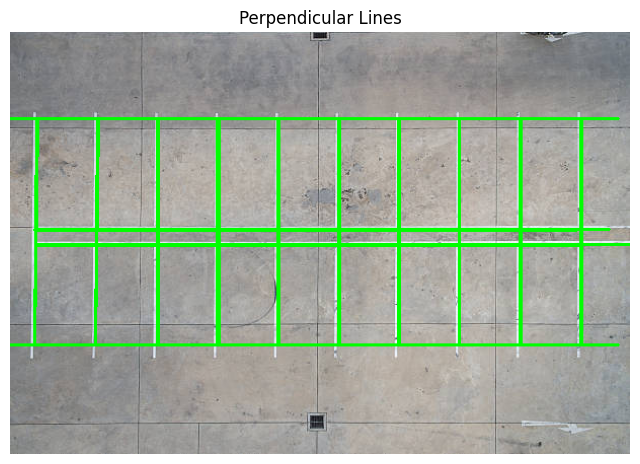

In [360]:
perpendicular_lines = []

#calculate angle between two lines (for perpendicularity)
def calculate_angle(line1, line2):
    #establishing vectors
    AB = (line1[2] - line1[0], line1[3] - line1[1])
    CD = (line2[2] - line2[0], line2[3] - line2[1])

    #dot product
    dot_product = AB[0] * CD[0] + AB[1] * CD[1]

    #magnitude of vectors
    magnitude_AB = np.sqrt(AB[0] ** 2 + AB[1] ** 2)
    magnitude_CD = np.sqrt(CD[0] ** 2 + CD[1] ** 2)

    #avoiding division by zero
    if magnitude_AB != 0 and magnitude_CD != 0:
        #cosine of the angle
        cos_angle = dot_product / (magnitude_AB * magnitude_CD)

        #converting angle to degrees
        angle_radians = np.arccos(cos_angle)
        angle_degrees = np.degrees(angle_radians)
        
        return angle_degrees
    return None



#finds which lines are perpendicular with each other
def find_perpendicular(lines):
    for i in range(len(lines)):
        for j in range(len(lines)):
            if (i != j):
                angle = calculate_angle(lines[i], lines[j])
                if (85 <= angle <= 95):
                    perpendicular_lines.append((lines[i], lines[j]))

find_perpendicular(line_list)
print(perpendicular_lines)

#draw perpendicular lines on image
for i in range(len(perpendicular_lines)):
    x1, y1, x2, y2 = perpendicular_lines[i][0]
    x3, y3, x4, y4 = perpendicular_lines[i][1]
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.line(line_image, (x3, y3), (x4, y4), (0, 255, 0), 2)

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.title('Perpendicular Lines')
plt.imshow(line_image, cmap='gray')
if save:
    plt.savefig('original1.png')
plt.show()

**Step 6:** Finding intersection points of perpendicular lines

[(503, 86), (324, 86), (563, 86), (87, 86), (205, 86), (564, 86), (384, 86), (504, 86), (27, 86), (265, 86), (145, 86), (26, 86), (383, 86), (146, 86), (443, 86), (264, 86), (325, 86), (206, 86), (204, 86), (86, 86), (503, 309), (324, 309), (563, 309), (84, 309), (205, 309), (564, 309), (384, 309), (504, 309), (24, 309), (265, 309), (145, 309), (24, 309), (383, 309), (146, 309), (443, 309), (264, 309), (325, 309), (206, 309), (204, 309), (84, 309), (503, 211), (324, 211), (563, 211), (85, 211), (205, 211), (564, 211), (384, 211), (504, 211), (25, 211), (265, 211), (145, 211), (24, 211), (383, 211), (146, 211), (443, 211), (264, 211), (325, 211), (206, 211), (204, 211), (84, 211), (503, 195), (324, 195), (563, 195), (85, 195), (205, 195), (564, 195), (384, 195), (504, 195), (25, 195), (265, 195), (145, 195), (25, 195), (383, 195), (146, 195), (443, 195), (264, 195), (325, 195), (206, 195), (204, 195), (85, 195), (503, 210), (324, 210), (563, 210), (85, 210), (205, 210), (564, 210), (384

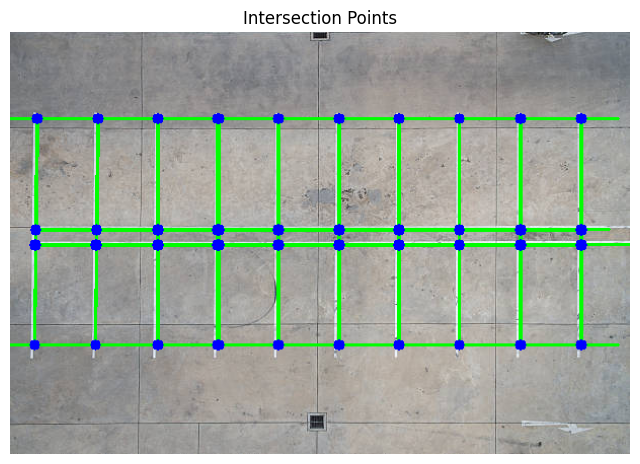

In [361]:
parking_spaces = {}

#find intersection of perpendicular lines
def find_intersections(perpendicular_lines):
    intersection_points = []
    #need to find every coordinate of the intersection on perpendicular lines and append it to a list of these coordinates
    for i in range(len(perpendicular_lines)):
        x1, y1, x2, y2 = perpendicular_lines[i][0] #line1
        x3, y3, x4, y4 = perpendicular_lines[i][1] #line2
        #check if line1 is vertical
        if x1 == x2:
            #if line2 is horizontal
            if y3 == y4:
                intersection_points.append((x1, y3))
            else:
                #calculate slope if line2 is not horizontal
                m2 = (y4 - y3) / (x4 - x3)
                b2 = y3 - m2 * x3
                y = m2 * x1 + b2
                intersection_points.append((x1, math.trunc(y)))
        #check if line1 is horizontal
        elif y1 == y2:
            #if line2 is vertical
            if x3 == x4:
                intersection_points.append((x3, y1))
            else:
                #calculate slope if line2 is not vertical
                m2 = (y4 - y3) / (x4 - x3)
                b2 = y3 - m2 * x3
                x = (y1 - b2) / m2
                intersection_points.append((math.trunc(x), y1))
    return intersection_points

intersection_points = find_intersections(perpendicular_lines)
print(intersection_points)
print(len(intersection_points))

#draw intersection points on image
for i in range(len(intersection_points)):
    cv2.circle(line_image, (int(intersection_points[i][0]), int(intersection_points[i][1])), 5, (0, 0, 255), -1)

plt.figure(figsize=(8, 8))
plt.axis('off')
plt.title('Intersection Points')
plt.imshow(line_image, cmap='gray')
if save:
    plt.savefig('original1.png')

plt.show()

**Step 6.5:** K-means clustering of intersection points

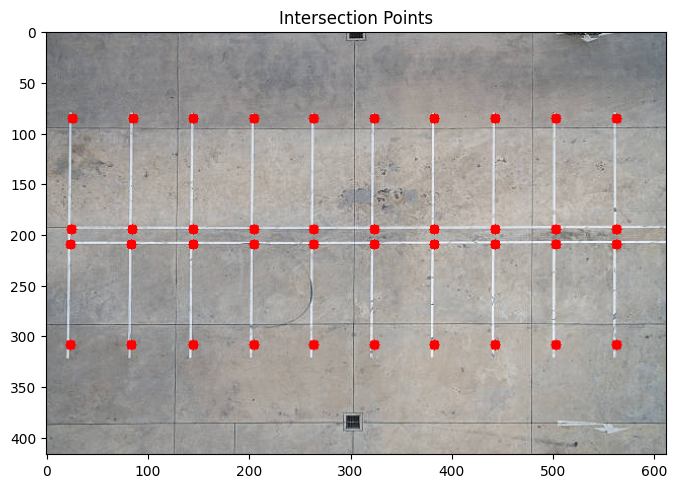

In [362]:
#Convert intersection points to numpy array for opencv kmeans
intersection_points = np.array(intersection_points, dtype=np.float32)
#criteria for kmeans
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
#kmeans clustering with 40 clusters
_, labels, centers = cv2.kmeans(intersection_points, 40, None, criteria, 10,  cv2.KMEANS_PP_CENTERS)

#convert centers to int32 for circles
centers = np.int32(centers)

for center in centers:
    cv2.circle(img1, tuple(center), 5, (255, 0, 0), -1)

plt.figure(figsize=(8, 8))
plt.axis('on')
plt.title('Intersection Points')
plt.imshow(img1, cmap='gray')
if save:
    plt.savefig('original1.png')
plt.show()

**Step 7:** Assign Parking Space Identities with clustered list

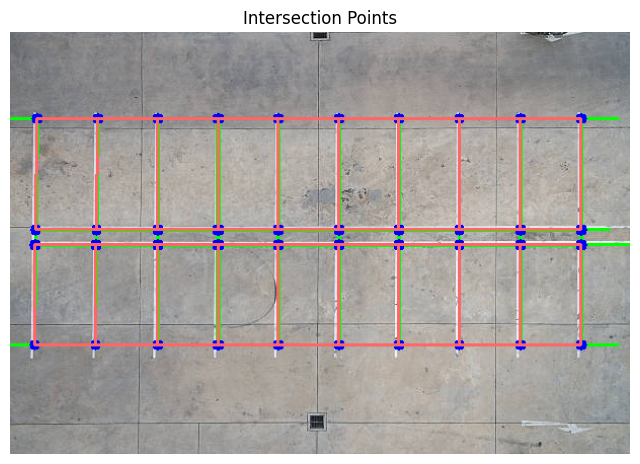

In [363]:
#sort y first then x
sortIndex = np.lexsort((centers[:, 0], centers[:, 1]))
sCenter = centers[sortIndex]

lots = []

#find parking lots
for i in range(0, len(sCenter), 20):
    for j in range(i, i + 9):

      #print(sCenter[j],sCenter[j+1],sCenter[j+10],sCenter[j+11])
      lots.append([sCenter[j],sCenter[j+1],sCenter[j+10],sCenter[j+11]])

      c1 = (int(sCenter[j][0]), int(sCenter[j][1]))
      c2 = (int(sCenter[j+1][0]), int(sCenter[j+1][1]))
      c3 = (int(sCenter[j+10][0]), int(sCenter[j+10][1]))
      c4 = (int(sCenter[j+11][0]), int(sCenter[j+11][1]))

      cv2.line(line_image,c1,c2,(255,102,102),2)
      cv2.line(line_image,c1,c3,(255,102,102),2)
      cv2.line(line_image,c3,c4,(255,102,102),2)
      cv2.line(line_image,c2,c4,(255,102,102),2)

#draw the graph
plt.figure(figsize=(8, 8))
plt.axis('off')
plt.title('Intersection Points')
plt.imshow(line_image, cmap='gray')
if save:
    plt.savefig('original1.png')

plt.show()

finalLots = np.array(lots)

#Parking Space Class - Paul code from here on
class ParkingSpace:
    def __init__(self, space, pt1, pt2, pt3, pt4, empty_avg):
        self.space = space
        self.pt1 = pt1
        self.pt2 = pt2
        self.pt3 = pt3
        self.pt4 = pt4
        self.empty_avg = empty_avg
    def __str__(self):
        return f'Parking Space: {self.space}, Point 1: {self.pt1}, Point 2: {self.pt2}, Point 3: {self.pt3}, Point 4: {self.pt4}, Empty Average: {self.empty_avg}'

#Parking Spaces
counter = 0
spaces_dict = {}
for parking_spaces in finalLots:
    counter += 1
    pt1 = parking_spaces[0]
    pt2 = parking_spaces[1]
    pt3 = parking_spaces[2]
    pt4 = parking_spaces[3]
    empty_avg = 0
    parking_space = ParkingSpace(counter, pt1, pt2, pt3, pt4, empty_avg)
    spaces_dict[counter] = parking_space

#print(spaces_dict[1])

empty_lot = mpimg.imread('images/lot_empty.jpg')
empty_lot = empty_lot[:,:,:3]
empty_lot = cv2.cvtColor(empty_lot, cv2.COLOR_BGR2GRAY)

#Find the average of the empty parking spaces
for i in range(1, len(spaces_dict) + 1):
    pt1 = spaces_dict[i].pt1
    pt2 = spaces_dict[i].pt2
    pt3 = spaces_dict[i].pt3
    pt4 = spaces_dict[i].pt4
    
    #print(pt1, pt2, pt3, pt4)
    #mask image for the parking space
    mask  = np.zeros_like(empty_lot)
    #the corners order actually matters, this orientation is important to make the whole square mask
    space_corners = np.array([[pt4, pt3, pt1, pt2]], dtype=np.int32)

    #make the mask with the image and the corners
    cv2.fillPoly(mask, space_corners, 255)

    #Apply stuff to prepare for edge detection
    masked_space = cv2.bitwise_and(empty_lot, empty_lot, mask=mask)
    masked_blur = cv2.GaussianBlur(masked_space, (5, 5), 1.1)
    masked_canny = cv2.Canny(masked_blur, 50, 150)

    #find the average of the empty parking space
    empty_avg = cv2.mean(masked_canny, mask=mask)[0]
    spaces_dict[i].empty_avg = empty_avg



### Part 2: Identify if there is a car in the parking space(s)

Parking Space 6 is occupied
Empty Average:  22.679545454545455  New Average:  39.17727272727273


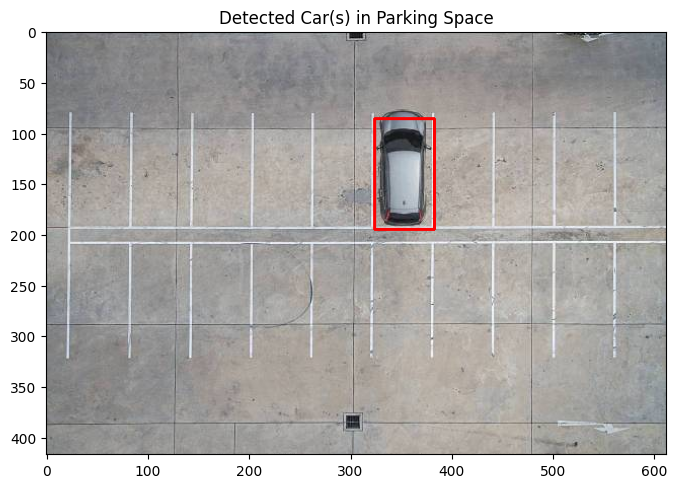

In [364]:
#Load parking lot with cars
parking_lot = mpimg.imread('images/lot_cars.jpg')
color_parking_lot = parking_lot
parking_lot = parking_lot[:,:,:3]
parking_lot = cv2.cvtColor(parking_lot, cv2.COLOR_BGR2GRAY)

#Find the average of all the spaces
for i in range(1, len(spaces_dict) + 1):
    pt1 = spaces_dict[i].pt1
    pt2 = spaces_dict[i].pt2
    pt3 = spaces_dict[i].pt3
    pt4 = spaces_dict[i].pt4

    #mask image for the parking space
    mask  = np.zeros_like(parking_lot)
    #the corners order actually matters, this orientation is important to make the whole square mask
    space_corners = np.array([[pt4, pt3, pt1, pt2]], dtype=np.int32)

    #make the mask with the image and the corners
    cv2.fillPoly(mask, space_corners, 255)

    #Apply stuff to prepare for edge detection
    masked_space = cv2.bitwise_and(parking_lot, parking_lot, mask=mask)
    masked_blur = cv2.GaussianBlur(masked_space, (5, 5), 1.1)
    masked_canny = cv2.Canny(masked_blur, 50, 150)

    #find the average of the empty parking space
    new_avg = cv2.mean(masked_canny, mask=mask)[0]

    #if the average of the empty space is less than the average of the occupied space with a 2 int difference (to account for noise variability), then the space is occupied
    if abs((spaces_dict[i].empty_avg - new_avg)) > 2:
        print (f'Parking Space {i} is occupied')
        print("Empty Average: ", spaces_dict[i].empty_avg, " New Average: ", new_avg)

        #Draw a red box around the space
        cv2.line(color_parking_lot,pt4,pt3,(255,0,0),2)
        cv2.line(color_parking_lot,pt3,pt1,(255,0,0),2)
        cv2.line(color_parking_lot,pt1,pt2,(255,0,0),2)
        cv2.line(color_parking_lot,pt2,pt4,(255,0,0),2)


plt.figure(figsize=(8, 8))
plt.axis('on')
plt.title('Detected Car(s) in Parking Space')
plt.imshow(color_parking_lot)
plt.show()
        